# PyBer

## dependencies and data

In [3]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
city_data = pd.read_csv("resources/city_data.csv")
ride_data = pd.read_csv("resources/ride_data.csv")

In [5]:
print(len(city_data))
city_data.head()

120


,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


In [6]:
print(len(ride_data))
ride_data.head()

2375


,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344


## 5.2.4: explore the data in Pandas

In [7]:
# city data: count the number of columns and rows that are not null

city_data.count() # 120 values per column

city            120
driver_count    120
type            120
dtype: int64

In [8]:
# get the columns and rows that are null

city_data.isnull().sum() # no missing values

city            0
driver_count    0
type            0
dtype: int64

In [9]:
# get the data type of each column
    # need to be sure 'driver_count' is numeric so we can perform calculations

city_data.dtypes # driver_count = int64, good

city            object
driver_count     int64
type            object
dtype: object

In [10]:
# get all unique values of city types

city_data["type"].unique() # 3 types

array(['Urban', 'Suburban', 'Rural'], dtype=object)

In [11]:
# get the number of data points from urban cities

sum(city_data["type"] == "Urban")

66

In [12]:
# ride data: get the columns and rows that are not null

ride_data.count() # 2375 rows per column

city       2375
date       2375
fare       2375
ride_id    2375
dtype: int64

In [13]:
# get the columns and rows that are null

ride_data.isnull().sum() # no null values

city       0
date       0
fare       0
ride_id    0
dtype: int64

In [14]:
# get data types for each column

ride_data.dtypes

city        object
date        object
fare       float64
ride_id      int64
dtype: object

In [15]:
# merge dataframes

pyber_df = pd.merge(ride_data, city_data, how = "left", on = ["city", "city"])

print(len(pyber_df))
pyber_df.head()

2375


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## 5.3.1: Create dataframes for each city type

In [16]:
# new dataframe for each type

urban_df = pyber_df[pyber_df["type"] == "Urban"]
suburb_df = pyber_df[pyber_df["type"] == "Suburban"]
rural_df = pyber_df[pyber_df["type"] == "Rural"]

## 5.3.2: Get the number of rides for each city type

In [17]:
urban_ride_count = urban_df.groupby(["city"]).count()["ride_id"]
suburb_ride_count = suburb_df.groupby(["city"]).count()["ride_id"]
rural_ride_count = rural_df.groupby(["city"]).count()["ride_id"]

## 5.3.3: Average fare for each city type

In [18]:
urban_avg_fare = urban_df.groupby(["city"]).mean()["fare"]
suburb_avg_fare = suburb_df.groupby(["city"]).mean()["fare"]
rural_avg_fare = rural_df.groupby(["city"]).mean()["fare"]

## 5.3.4: Average number of drivers per city type

In [19]:
urban_avg_drivers = urban_df.groupby(["city"]).mean()["driver_count"]
suburb_avg_drivers = suburb_df.groupby(["city"]).mean()["driver_count"]
rural_avg_drivers = rural_df.groupby(["city"]).mean()["driver_count"]

## 5.3.5: Create bubble charts

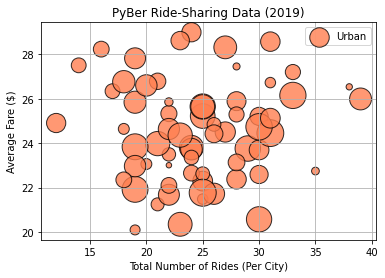

In [35]:
# urban cities

plt.scatter(urban_ride_count,urban_avg_fare,
      s = 10*urban_avg_drivers, c = "coral",
      edgecolor = "black", linewidths = 1,
      alpha = 0.8, label = "Urban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

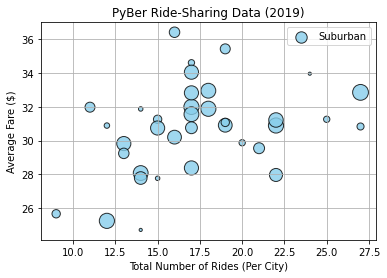

In [34]:
# suburban cities

plt.scatter(suburb_ride_count, suburb_avg_fare,
      s=10*suburb_avg_drivers, c="skyblue",
      ec="black", lw=1,
      alpha=0.8, label="Suburban")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

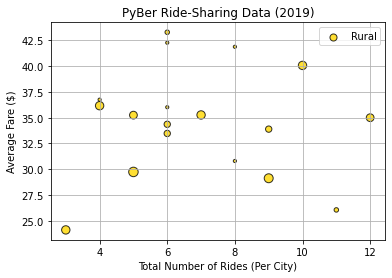

In [33]:
# rural cities

plt.scatter(rural_ride_count, rural_avg_fare,
      s=10*rural_avg_drivers, c="gold",
      ec="black", lw=1,
      alpha=0.8, label="Rural")
plt.title("PyBer Ride-Sharing Data (2019)")
plt.ylabel("Average Fare ($)")
plt.xlabel("Total Number of Rides (Per City)")
plt.grid(True)
plt.legend()

## 5.3.6: Create a bubble chart for all cities

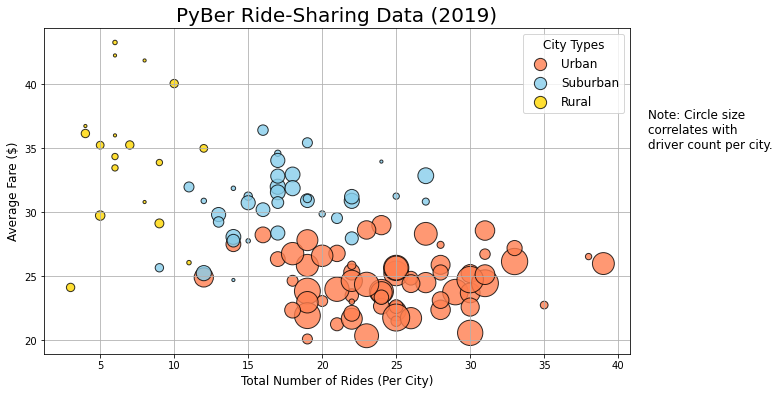

In [109]:
plt.subplots(figsize=(11, 6))

plt.scatter(urban_ride_count,urban_avg_fare,
      s = 10*urban_avg_drivers, c = "coral",
      edgecolor = "black", linewidths = 1,
      alpha = 0.8, label = "Urban")

plt.scatter(suburb_ride_count, suburb_avg_fare,
      s=10*suburb_avg_drivers, c="skyblue",
      ec="black", lw=1,
      alpha=0.8, label="Suburban")

plt.scatter(rural_ride_count, rural_avg_fare,
      s=10*rural_avg_drivers, c="gold",
      ec="black", lw=1,
      alpha=0.8, label="Rural")

plt.title("PyBer Ride-Sharing Data (2019)", fontsize=20)
plt.ylabel("Average Fare ($)", fontsize=12)
plt.xlabel("Total Number of Rides (Per City)", fontsize=12)
plt.grid(True)

# Create a legend
lgnd = plt.legend(fontsize="12", mode="Expanded",
         scatterpoints=1, loc="best", title="City Types")
lgnd.legendHandles[0]._sizes = [150]
lgnd.legendHandles[1]._sizes = [150]
lgnd.legendHandles[2]._sizes = [150]
lgnd.get_title().set_fontsize(12)

# Incorporate a text label about circle size.
plt.text(42, 35, f"Note: Circle size\ncorrelates with\ndriver count per city.", fontsize="12")
plt.subplots_adjust(left=0.06, right=0.8) # adjust position of L/R margins to visualize note in figure
plt.savefig("analysis/Fig1.png",facecolor='white')

plt.show()


## 5.4.1: Summary stats for number of rides by city type

In [112]:
# mean ride counts for each city type

round(urban_ride_count.mean(),2), round(suburb_ride_count.mean(),2), round(rural_ride_count.mean(),2)

(24.62, 17.36, 6.94)

In [121]:
# median ride counts

urban_ride_count.median(), suburb_ride_count.median(), rural_ride_count.median()

(24.0, 17.0, 6.0)

In [122]:
# modes of ride counts

urban_ride_count.mode(), suburb_ride_count.mode(), rural_ride_count.mode()

(0    22
 1    25
 Name: ride_id, dtype: int64,
 0    17
 Name: ride_id, dtype: int64,
 0    6
 Name: ride_id, dtype: int64)

In [123]:
# Import NumPy and the stats module from SciPy.
import numpy as np
import scipy.stats as sts

In [131]:
# measures of central tendency

mean_urban_ride_count = np.mean(urban_ride_count)
print(f"The mean ride count for urban trips is {mean_urban_ride_count:.2f}.")

median_urban_ride_count = np.median(urban_ride_count)
print(f"The median ride count for urban trips is {median_urban_ride_count:.2f}.")
      
mode_urban_ride_count = sts.mode(urban_ride_count)
print(f"The mode for the ride counts for urban trips is {mode_urban_ride_count.mode[0]}.")

print(f"\n")

mean_suburb_ride_count = np.mean(suburb_ride_count)
print(f"The mean ride count for suburban trips is {mean_suburb_ride_count:.2f}.")

median_suburb_ride_count = np.median(suburb_ride_count)
print(f"The median ride count for suburban trips is {median_suburb_ride_count:.2f}.")
      
mode_suburb_ride_count = sts.mode(suburb_ride_count)
print(f"The mode for the ride counts for suburban trips is {mode_suburb_ride_count.mode[0]}.")

print(f"\n")

mean_rural_ride_count = np.mean(rural_ride_count)
print(f"The mean ride count for rural trips is {mean_rural_ride_count:.2f}.")

median_rural_ride_count = np.median(rural_ride_count)
print(f"The median ride count for rural trips is {median_rural_ride_count:.2f}.")
      
mode_rural_ride_count = sts.mode(rural_ride_count)
print(f"The mode for the ride counts for rural trips is {mode_rural_ride_count.mode[0]}.")

The mean ride count for urban trips is 24.62.
The median ride count for urban trips is 24.00.
The mode for the ride counts for urban trips is 22.


The mean ride count for suburban trips is 17.36.
The median ride count for suburban trips is 17.00.
The mode for the ride counts for suburban trips is 17.


The mean ride count for rural trips is 6.94.
The median ride count for rural trips is 6.00.
The mode for the ride counts for rural trips is 6.


## 5.4.2: Summary stats for fare by city type

In [133]:
urban_fares = urban_df["fare"]
suburb_fares = suburb_df["fare"]
rural_fares = rural_df["fare"]

In [136]:
# measures of central tendency

mean_urban_fares = np.mean(urban_fares)
print(f"The mean fare for rides in urban cities is {mean_urban_fares:.2f}")

median_urban_fares = np.median(urban_fares)
print(f"The median fare for rides in urban cities is {median_urban_fares:.2f}")

mode_urban_fares = sts.mode(urban_fares)
print(f"The mode of fares for rides in urban cities is {mode_urban_fares.mode[0]}")

print(f"\n")

mean_suburb_fares = np.mean(suburb_fares)
print(f"The mean fare for rides in suburban cities is {mean_suburb_fares:.2f}")

median_suburb_fares = np.median(suburb_fares)
print(f"The median fare for rides in suburban cities is {median_suburb_fares:.2f}")

mode_suburb_fares = sts.mode(suburb_fares)
print(f"The mode of fares for rides in suburban cities is {mode_suburb_fares.mode[0]}")

print(f"\n")

mean_rural_fares = np.mean(rural_fares)
print(f"The mean fare for rides in rural cities is {mean_rural_fares:.2f}")

median_rural_fares = np.median(rural_fares)
print(f"The median fare for rides in rural cities is {median_rural_fares:.2f}")

mode_rural_fares = sts.mode(rural_fares)
print(f"The mode of fares for rides in rural cities is {mode_rural_fares.mode[0]}")


The mean fare for rides in urban cities is 24.53
The median fare for rides in urban cities is 24.64
The mode of fares for rides in urban cities is 22.86


The mean fare for rides in suburban cities is 30.97
The median fare for rides in suburban cities is 30.75
The mode of fares for rides in suburban cities is 17.99


The mean fare for rides in rural cities is 34.62
The median fare for rides in rural cities is 37.05
The mode of fares for rides in rural cities is 37.05


## 5.4.3: Summary stats for number of drivers by city type

In [138]:
urban_drivers = urban_df['driver_count']
suburb_drivers = suburb_df['driver_count']
rural_drivers = rural_df['driver_count']

In [139]:
# measures of central tendency

mean_urban_drivers = np.mean(urban_drivers)
print(f"The mean number of drivers in urban cities is {mean_urban_drivers:.2f}")

median_urban_drivers = np.median(urban_drivers)
print(f"The median number of drivers in urban cities is {median_urban_drivers:.2f}")

mode_urban_drivers = sts.mode(urban_drivers)
print(f"The mode number of drivers in urban cities is {mode_urban_drivers.mode[0]}")

print(f"\n")

mean_suburb_drivers = np.mean(suburb_drivers)
print(f"The mean number of drivers in suburban cities is {mean_suburb_drivers:.2f}")

median_suburb_drivers = np.median(suburb_drivers)
print(f"The median number of drivers in suburban cities is {median_suburb_drivers:.2f}")

mode_suburb_drivers = sts.mode(suburb_drivers)
print(f"The mode number of drivers in suburban cities is {mode_suburb_drivers.mode[0]}")

print(f"\n")

mean_rural_drivers = np.mean(rural_drivers)
print(f"The mean number of drivers in rural cities is {mean_rural_drivers:.2f}")

median_rural_drivers = np.median(rural_drivers)
print(f"The median number of drivers in rural cities is {median_rural_drivers:.2f}")

mode_rural_drivers = sts.mode(rural_drivers)
print(f"The mode number of drivers in rural cities is {mode_rural_drivers.mode[0]}")


The mean number of drivers in urban cities is 36.68
The median number of drivers in urban cities is 37.00
The mode number of drivers in urban cities is 39


The mean number of drivers in suburban cities is 13.71
The median number of drivers in suburban cities is 16.00
The mode number of drivers in suburban cities is 20


The mean number of drivers in rural cities is 4.30
The median number of drivers in rural cities is 4.00
The mode number of drivers in rural cities is 1


## 5.4.4: Box-and-whisker plots

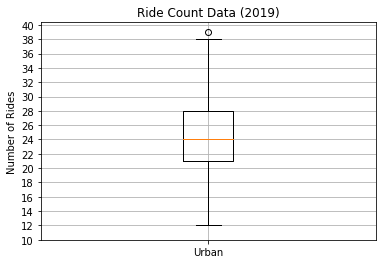

In [146]:
# urban ride count data

x_axis = ["Urban"]
fig, ax = plt.subplots()
ax.boxplot(urban_ride_count,labels=x_axis)
ax.set_title("Urban Ride Counts (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(10,42,2))
ax.grid()
plt.show()

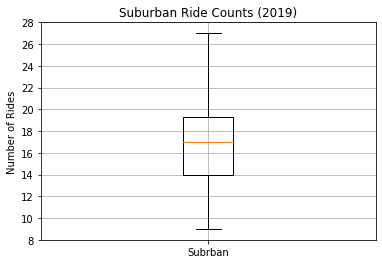

In [151]:
# suburban data

x_axis = ["Subrban"]
fig, ax = plt.subplots()
ax.boxplot(suburb_ride_count,labels=x_axis)
ax.set_title("Suburban Ride Counts (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(8,29,2))
ax.grid()
plt.show()

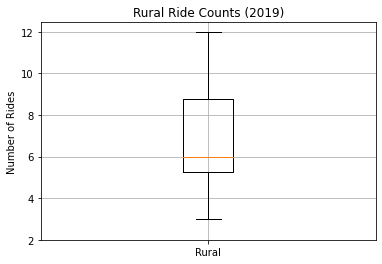

In [153]:
# rural data

x_axis = ["Rural"]
fig, ax = plt.subplots()
ax.boxplot(rural_ride_count,labels=x_axis)
ax.set_title("Rural Ride Counts (2019)")
ax.set_ylabel("Number of Rides")
ax.set_yticks(np.arange(2,14,2))
ax.grid()
plt.show()

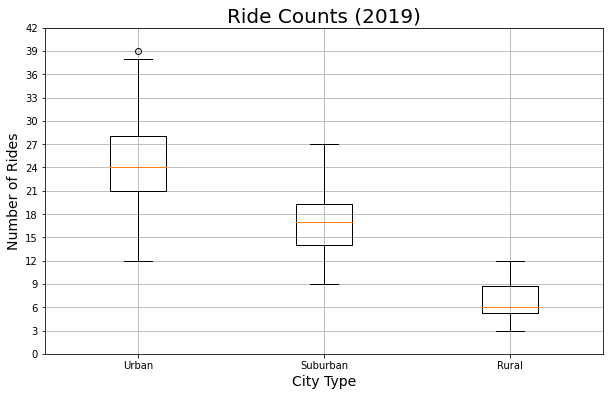

In [160]:
# single plot for all city types

x_labels = ["Urban", "Suburban", "Rural"]
ride_counts = [urban_ride_count, suburb_ride_count, rural_ride_count]

fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Ride Counts (2019)',fontsize=20)
ax.set_ylabel('Number of Rides',fontsize=14)
ax.set_xlabel("City Type",fontsize=14)
ax.boxplot(ride_counts, labels=x_labels)
ax.set_yticks(np.arange(0, 45, step=3.0))
ax.grid()

plt.savefig("analysis/Fig2.png",facecolor='white')
plt.show()

In [164]:
# identify the single outlier from urban_ride_count

urban_outlier = urban_ride_count[urban_ride_count==39].index[0]
print(f"{urban_outlier} has the highest rider count.")

West Angela has the highest rider count.


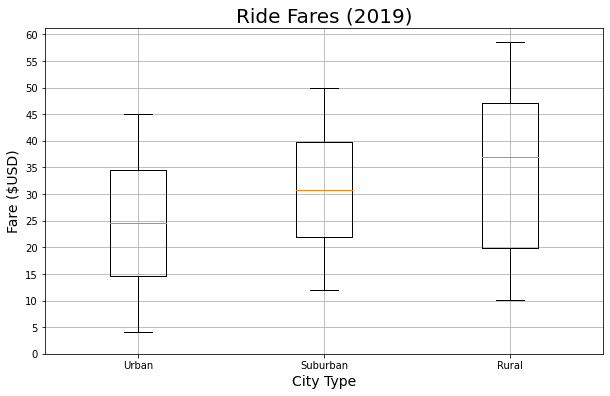

In [171]:
# box-and-whisker plot: fares

x_labels = ["Urban", "Suburban", "Rural"]
fares = [urban_fares, suburb_fares, rural_fares]

fig, ax = plt.subplots(figsize = (10,6))
ax.boxplot(fares, labels = x_labels)
ax.set_yticks(np.arange(0,61,5))
ax.grid()
ax.set_title("Ride Fares (2019)", fontsize = 20)
ax.set_xlabel("City Type", fontsize = 14)
ax.set_ylabel("Fare ($USD)", fontsize = 14)

plt.savefig("analysis/Fig3.png", facecolor = "white")
plt.show()

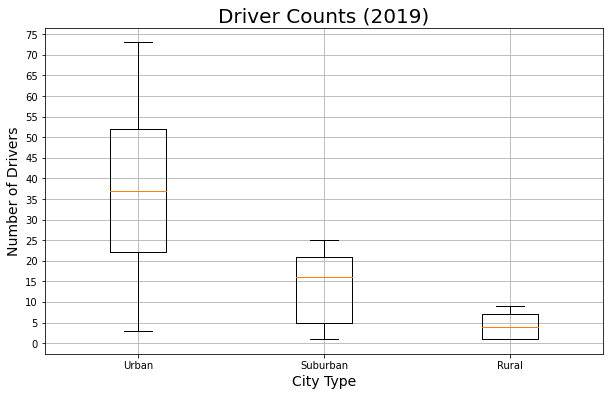

In [173]:
# boxplot: driver counts

x_labels = ["Urban", "Suburban", "Rural"]
drivers = [urban_drivers, suburb_drivers, rural_drivers]

fig, ax = plt.subplots(figsize = (10,6))
ax.boxplot(drivers, labels = x_labels)
ax.set_yticks(np.arange(0,76,5))
ax.grid()
ax.set_title("Driver Counts (2019)", fontsize = 20)
ax.set_xlabel("City Type", fontsize = 14)
ax.set_ylabel("Number of Drivers", fontsize = 14)

plt.savefig("analysis/Fig4.png", facecolor = "white")
plt.show()